# Lab 5
  
**Name: Sneha Gupta <br>
RegNo: 21112341 <br>
Class: 4BScEA** 
****

### **Objective:** <br>

Perform logistic regression and hyperparameter tuning.

### **Problem Statement:** <br>

1. Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing correlation between department and employee retention
4. Build logistic regression model using variables selected from selected from step 1
5. Identify the suitable evaluation metric for the dataset based on the class distribution and measure the evaluation metric, justify why is the chosen evaluation metric is better for your model.
6. Perform Hyper parameters tuning and train the model accordingly for better accuracy.

### **Methodology:** <br>
* Import excel file
* Check for null values
* Perform EDA to understad the dataset
* Perform Model Training and Testing using Logistic Regression
* Display accuracy score and predicted output
* Display confusion metrics and other evaluation metrics to get the best out of all.
* Perform hyper parameter tuning

### **Observation:** <br>
* Employees are working more rather than leaving if the satisfaction level is high.
* Employees are working more rather than leaving if the last evaluation level is high.
* Employees are leaving more rather than working if the number of projects given are more.
* Employees are working more rather than leaving if the time level is high.
* Employees are working and leaving at an equal rate if the average monthly hours level is high.
* Employees are working and leaving at an equal rate if the accident level is high.
* Employees are working and leaving at an equal rate if the promotion level is high.
* Employees are working and leaving at an equal rate if the salary level is increasing.
* Employees are working and leaving at an equal rate according to the Department.
* Most of the people have medium salary represented by orange color followed by high and then low salary. Very less people have low salary represented by blue color.
* Accuracy score is 75%
* In confusion matrix, false negative should be the lowest but true negative is the lowest. This means that the accuracy will be low.
* Precision and Recall score are very low for 1 which means that the model has not predicted independent variable correctly.
* Accuracy score is also 75%
* Best estimation metrics can be considered as confusion metrics as it tells the number of false positive, false negative, true positive, true negative.
* Confusion metrics can also be used to find accuarcy as displayed in accuracy_1

### **Learnings:** <br>
* Perform logistic regression
* Interpret confusion matrix
* Interpret Recall and precision

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |
| 4 | Completed |
| 5 | Completed |
| 6 | Completed |

In [148]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [149]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\HR_comma_sep.csv",index_col=False)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [150]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### `LABEL ENCODING`

In [151]:
salary = LabelEncoder()
df['salary'] = salary.fit_transform(df['salary'])

In [152]:
Department = LabelEncoder()
df['Department'] = salary.fit_transform(df['Department'])

#### 1. Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

<AxesSubplot:>

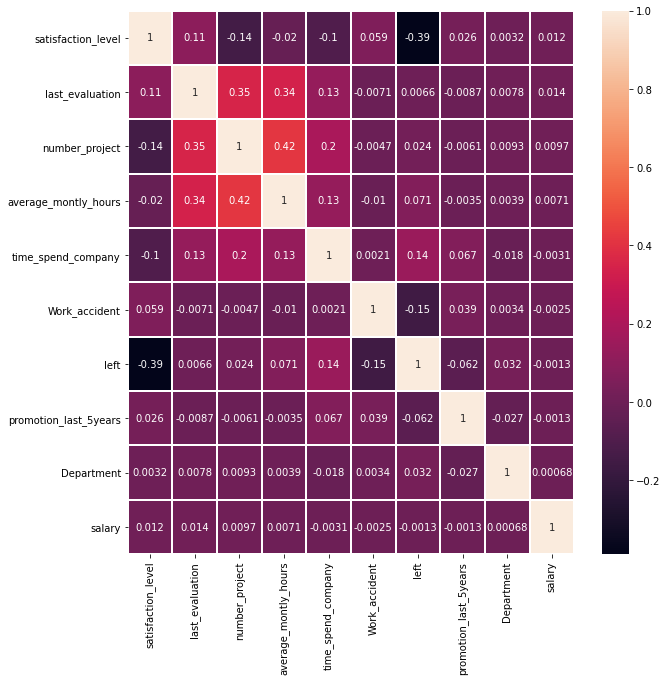

In [153]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,linewidths=1)

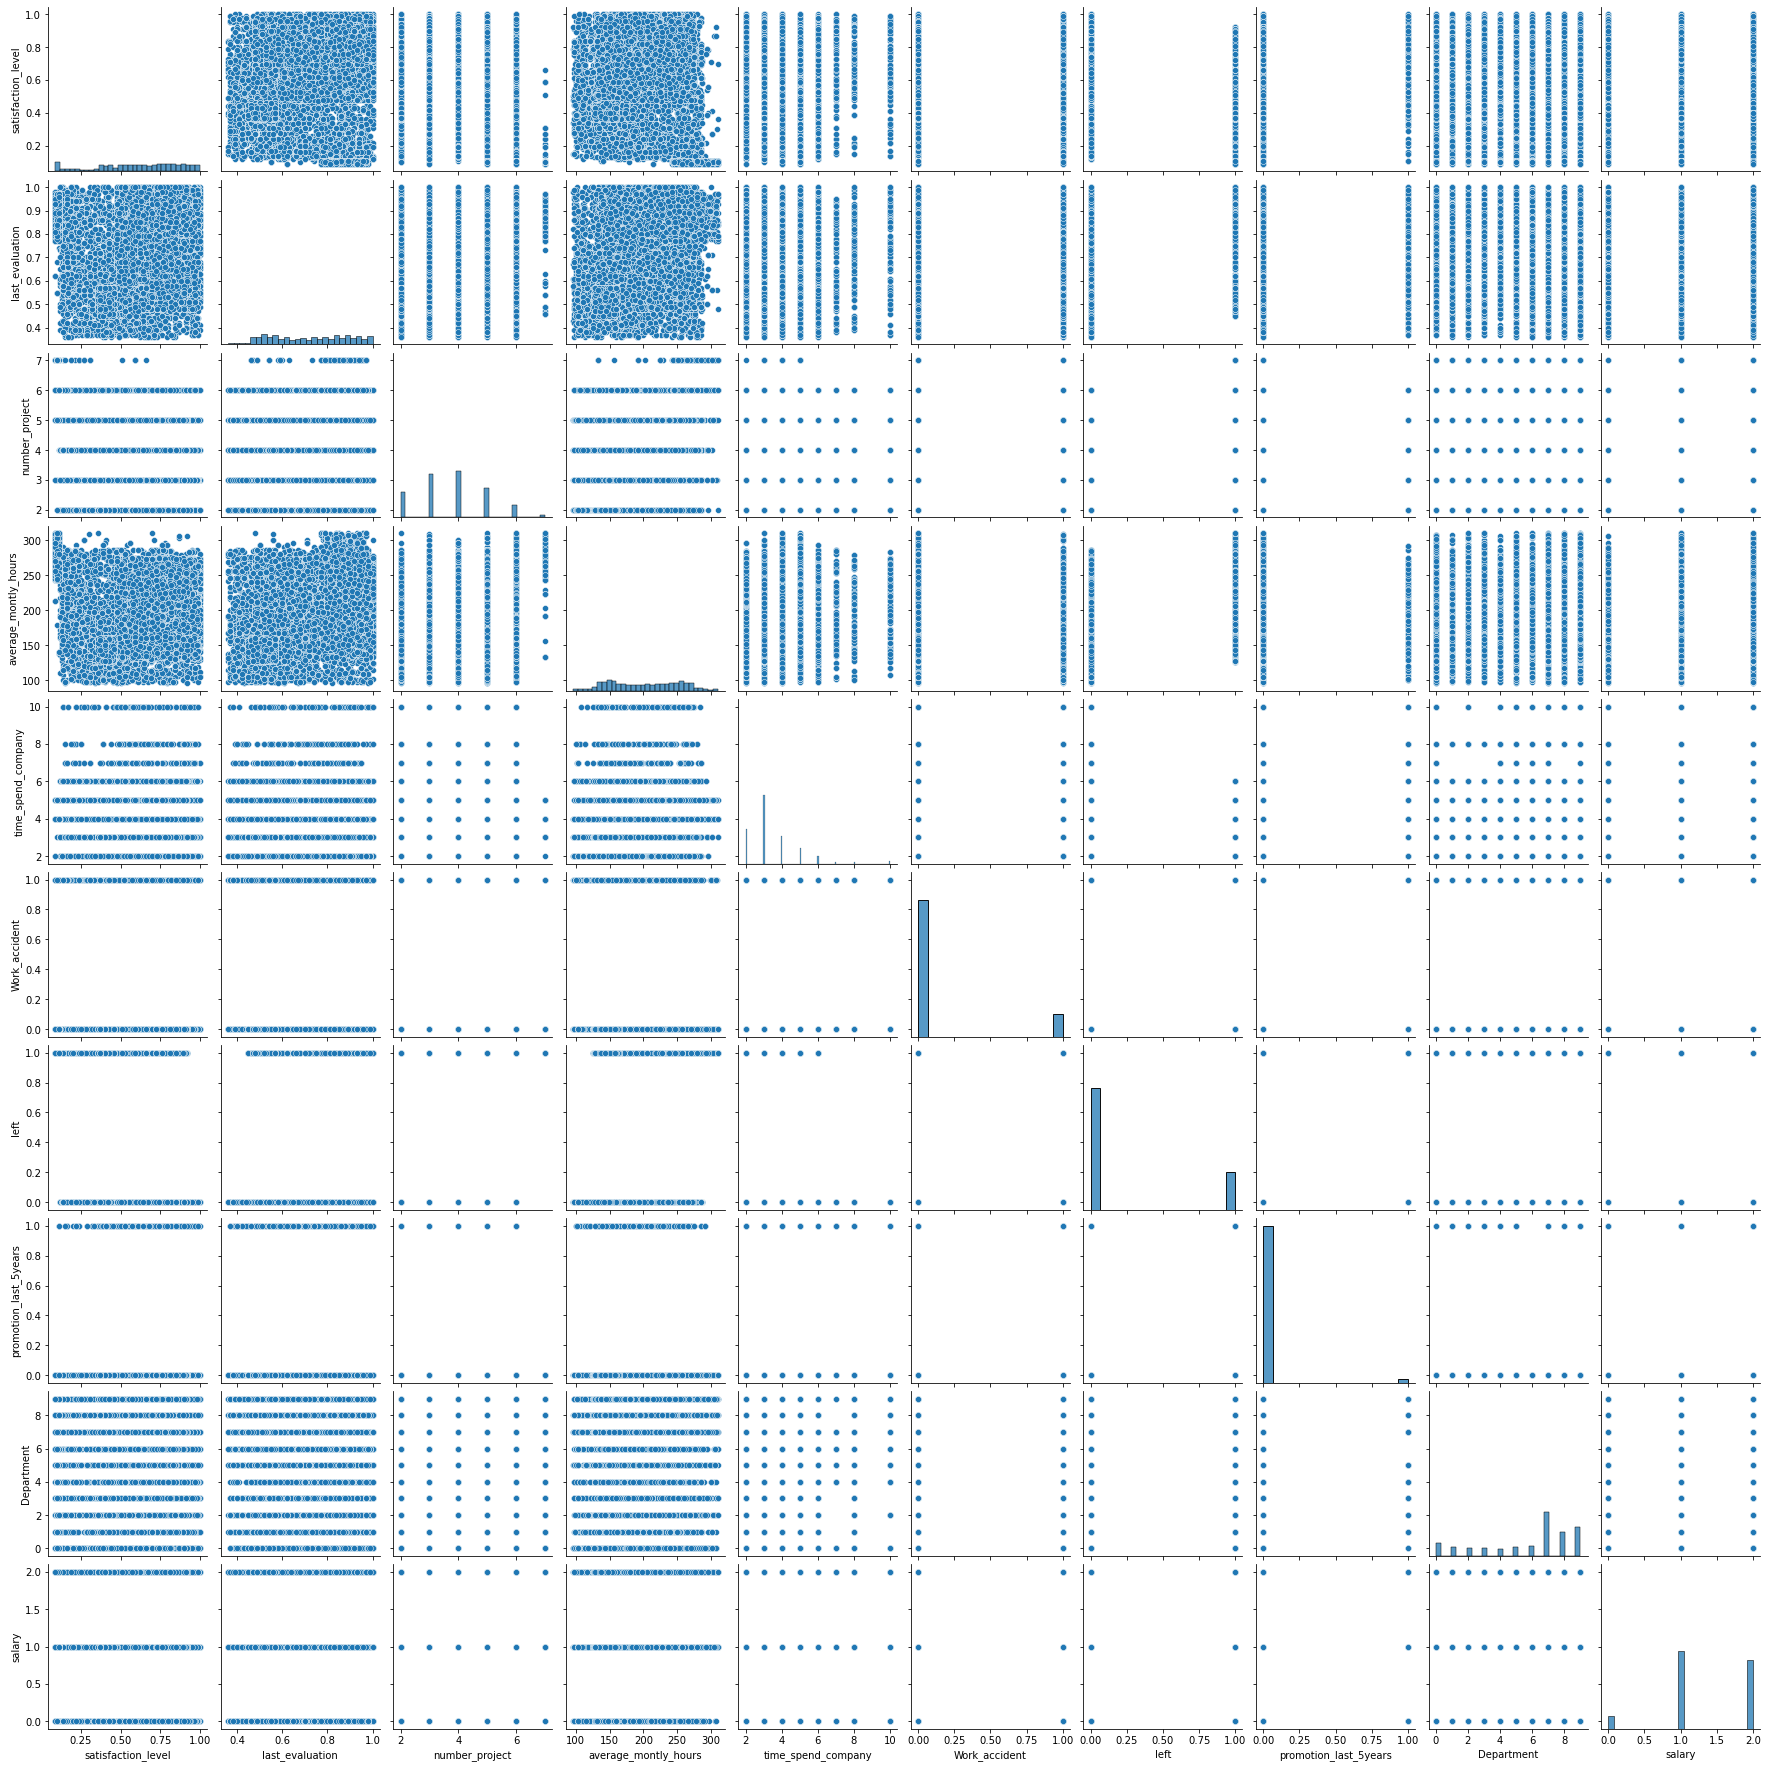

In [154]:
sns.pairplot(df)

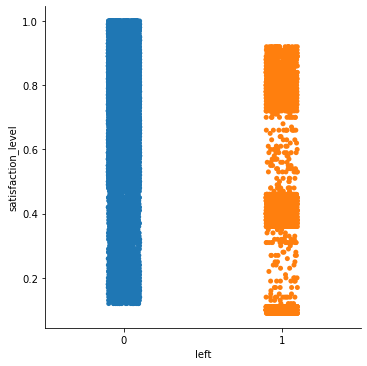

In [155]:
sns.catplot(data = df,x = 'left', y = 'satisfaction_level')

**Observation**: Employees are working more rather than leaving if the satisfaction level is high.

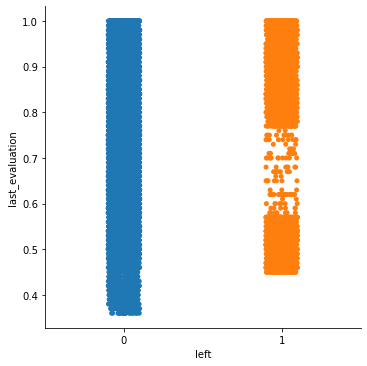

In [156]:
sns.catplot(data = df,x = 'left', y = 'last_evaluation')

**Observation**: Employees are working more rather than leaving if the last evaluation level is high.

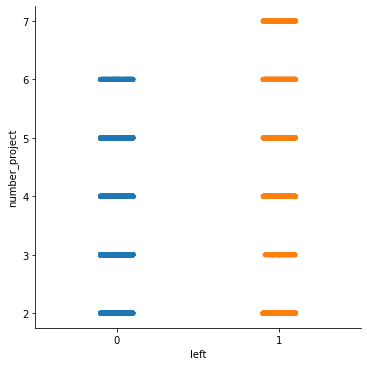

In [157]:
sns.catplot(data = df,x = 'left', y = 'number_project')

**Observation**: Employees are leaving more rather than working if the number of projects given are more.

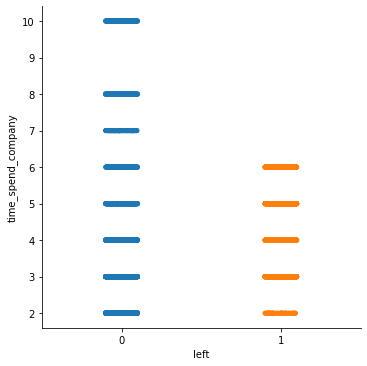

In [158]:
sns.catplot(data = df,x = 'left', y = 'time_spend_company')

**Observation**: Employees are working more rather than leaving if the time level is high.

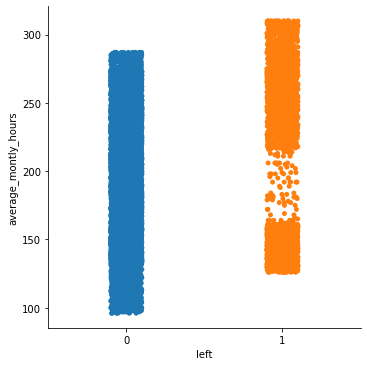

In [159]:
sns.catplot(data = df,x = 'left', y = 'average_montly_hours')

**Observation**: Employees are working and leaving at an equal rate if the average monthly hours level is high.

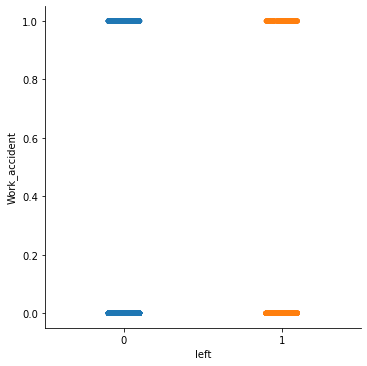

In [160]:
sns.catplot(data = df,x = 'left', y = 'Work_accident')

**Observation**: Employees are working and leaving at an equal rate if the accident level is high.

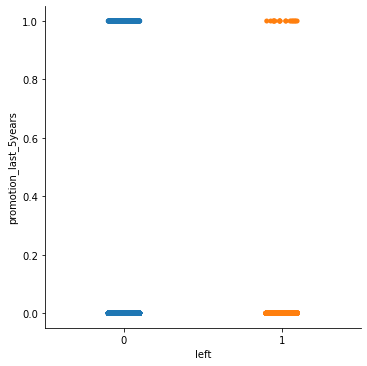

In [161]:
sns.catplot(data = df,x = 'left', y = 'promotion_last_5years')

**Observation**: Employees are working and leaving at an equal rate if the promotion level is high.

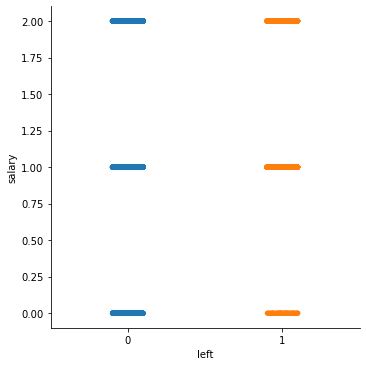

In [162]:
sns.catplot(data = df,x = 'left', y = 'salary')

**Observation**: Employees are working and leaving at an equal rate if the salary level is increasing.

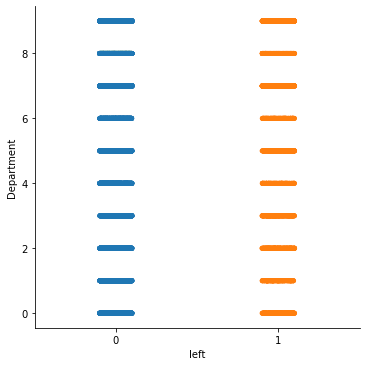

In [163]:
sns.catplot(data = df,x = 'left', y = 'Department')

**Observation**: Employees are working and leaving at an equal rate according to the Department.

#### 2. Plot bar charts showing impact of employee salaries on retention

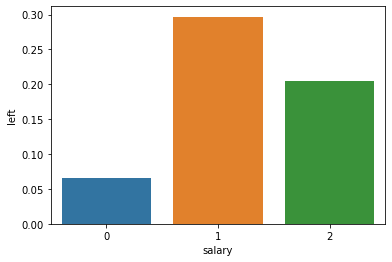

In [164]:
bar = sns.barplot(x = df['salary'], y = df["left"], ci = None)

**Observation**: Most of the people have medium salary represented by orange color followed by high and then low salary. Very less people have low salary represented by blue color.

#### 3. Plot bar charts showing correlation between department and employee retention

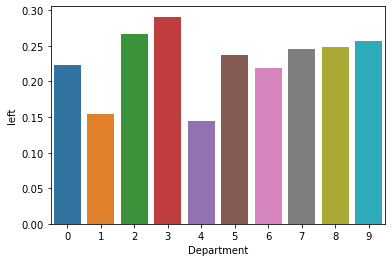

In [165]:
bar = sns.barplot(x = df['Department'], y = df["left"], ci = None)

**Observation**: As the number of departments are increasing, people leave more.

In [166]:
from scipy.stats import chi2_contingency
  
# defining the table
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


#### 4. Build logistic regression model using variables selected from selected from step 1

In [167]:
X = df.drop(['left','number_project','Work_accident','salary','last_evaluation'],axis=1)
y = df['left']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [169]:
X_train.shape

(10499, 5)

In [170]:
model=LogisticRegression()

In [171]:
model.fit(X_train,y_train)

LogisticRegression()

In [172]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
model.score(X_test,y_test)

0.754

In [174]:
accuracy_score(y_test, y_pred)

0.754

#### 5. Identify the suitable evaluation metric for the dataset based on the class distribution and measure the evaluation metric, justify why is the chosen evaluation metric is better for your model.

In [175]:
X_test.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,Department
6723,0.65,226,2,0,5
6473,0.88,166,2,0,0
4679,0.69,214,2,0,7
862,0.41,154,3,0,7
7286,0.87,254,2,0,3


In [176]:
model.predict_proba(X_test)

array([[0.85228812, 0.14771188],
       [0.94814116, 0.05185884],
       [0.86433297, 0.13566703],
       ...,
       [0.89600612, 0.10399388],
       [0.93733386, 0.06266614],
       [0.96297109, 0.03702891]])

In [177]:
y_pred = model.predict(X_test)

In [178]:
confusion_matrix(y_test,y_pred)

array([[3127,  301],
       [ 806,  266]], dtype=int64)

In [179]:
# get accuracy using confusion matrix
accuracy_1 = (3127+266)/(3127+266+806+401)
accuracy_1

0.7376086956521739

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3428
           1       0.47      0.25      0.32      1072

    accuracy                           0.75      4500
   macro avg       0.63      0.58      0.59      4500
weighted avg       0.72      0.75      0.72      4500



**Observation**: 
* In confusion matrix, false negative should be the lowest but true negative is the lowest. This means that the accuracy will be low.
* Precision and Recall score are very low for 1 which means that the model has not predicted independent variable correctly.
* Accuracy score is also 75%
* Best estimation metrics can be considered as confusion metrics as it tells the number of false positive, false negative, true positive, true negative.
* Confusion metrics can also be used to find accuarcy as displayed in accuracy_1

#### 6. Perform Hyper parameters tuning and train the model accordingly for better accuracy.

In [181]:
lgreg1=LogisticRegression(multi_class='ovr',solver='liblinear')

In [182]:
parameters = {'penalty':['l1','l2'],'C':[1,2.0,3.0,4.0,5.0],'max_iter':[100,200,300,400,500,600]}

In [183]:
from sklearn.model_selection import GridSearchCV
grid_class1=GridSearchCV(lgreg1,param_grid=parameters,scoring='accuracy',cv=5)

In [184]:
grid_class1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [1, 2.0, 3.0, 4.0, 5.0],
                         'max_iter': [100, 200, 300, 400, 500, 600],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [185]:
print(grid_class1.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [186]:
print(grid_class1.best_score_)

0.7698832550647701


<hr>